Monte Carlo: sampling from a probability distribution to predict outcomes

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# random.lognormvariate(mu, sigma) # model random walks with this sort of distribution?
mu = .12
sigma = .15
# [random.lognormvariate(mu, sigma) for _ in range(100)]
growth_per_year = np.random.lognormal(mu, sigma, size=20)
growth_per_year

array([ 1.35109146,  1.18222828,  1.25611403,  1.25217252,  1.06036302,
        1.52788004,  1.09382503,  1.03553915,  1.16543809,  1.10277991,
        1.24771395,  0.89023389,  0.86124371,  1.07918986,  0.95265975,
        1.20007586,  1.32163028,  0.83574638,  1.2033757 ,  0.89550398])

In [3]:
cumulative_returns = np.cumprod(growth_per_year) # this will be the factor of the growth from the beginning
cumulative_returns

array([  1.56226697,   2.2285251 ,   2.56657425,   2.63961832,
         3.16821496,   4.3806425 ,   4.42719097,   6.39318283,
         7.0074827 ,   5.69667858,   6.24274381,   8.44053929,
         8.33908226,   8.84176462,   9.78372891,  14.15146357,
        12.79502365,  15.41294193,  13.36969581,  14.34958026])

In [10]:
100_000 * cumulative_returns # For example, an account with $100,000

array([  156226.69704431,   222852.50965268,   256657.42513471,
         263961.83209281,   316821.49589227,   438064.25011375,
         442719.09695539,   639318.28266026,   700748.26979665,
         569667.85762595,   624274.38058602,   844053.92870935,
         833908.22596698,   884176.46230749,   978372.89080883,
        1415146.35749783,  1279502.36501952,  1541294.19289123,
        1336969.58147066,  1434958.0257338 ])

So let's model an account growth over 20 years, assuming an average growth of 12%, a standard deviation of 15%, with 1000 different runs.

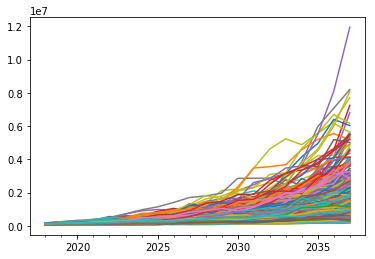

In [6]:
starting_account_value = 100_000

df = pd.DataFrame(
    np.cumprod(
        np.random.lognormal(.12, .15, size=(20,1000)),
        axis=0) * starting_account_value,
    index=pd.date_range('2018', periods=20, freq='Y')
)

ax = df.plot()

ax.legend().remove()
#plt.show()

We now need to use the end results to estimate the distribution of the final results.

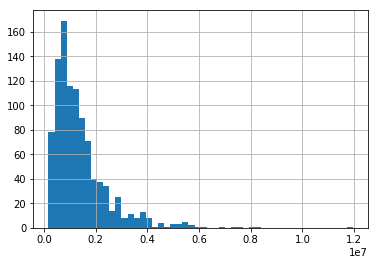

In [11]:
end_results = df.iloc[-1]
end_results.hist(bins=50)

In [12]:
end_results.describe(percentiles=[.05, .25, .5, .75, .95])

count    1.000000e+03
mean     1.410644e+06
std      1.134233e+06
min      1.700736e+05
5%       3.590272e+05
25%      6.952198e+05
50%      1.110414e+06
75%      1.718650e+06
95%      3.669284e+06
max      1.195147e+07
Name: 2037-12-31 00:00:00, dtype: float64